In [3]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')
    
df = pd.read_csv('bicycle6.csv', encoding='utf-8', index_col=0)
df

대여일자  대여시간(24)  대여소번호                          대여소명  대여권   연령대  \
1       2018-12-02        14   1366                1366. 일신초등학교 옆  정기권   30대   
2       2018-06-16        12   1675               1675.  월계문화체육센터  단체권   30대   
3       2018-07-03        11    567              567.  성수역 2번출구 앞  정기권  70대~   
5       2018-04-21        11   3102                  3102.  연희삼거리  정기권   30대   
7       2019-09-30        19    111               111. 상수역 2번출구 앞  정기권   20대   
...            ...       ...    ...                           ...  ...   ...   
999995  2020-03-02        18   1288                1288. 문정중교 사거리  일일권   30대   
999996  2018-08-22         8    714          714.  한국SGI 양천문화회관 앞  정기권   20대   
999997  2020-07-01        17   2621             2621. 한성백제역 2번 출구  정기권  70대~   
999998  2018-04-16        15    305                  305.  종로구청 옆  정기권   40대   
999999  2018-07-29        17   1019  1019.  다성이즈빌아파트(호원대 대각선 맞은편)  정기권   20대   

         성별  이동거리(km)  사용시간(hr)  속도(km/h)     년   월  
1         M      2.43      0.32      7.59  2018  12  
2         F     31.01      3.20      9.69  2018   6  
3         M      3.73      0.72      5.18  2018   7  
5         M      3.01      0.28     10.75  2018   4  
7         M      1.70      0.20      8.50  2019   9  
...     ...       ...       ...       ...   ...  ..  
999995    M     12.64      1.55      8.15  2020   3  
999996    F      1.38      0.17      8.12  2018   8  
999997  NaN      1.07      0.27      3.96  2020   7  
999998    F      2.83      0.40      7.08  2018   4  
999999    F      1.21      0.13      9.31  2018   7  

[604150 rows x 12 columns]

In [4]:
df['연령대'].value_counts()

20대     270832
30대     147281
40대      92456
50대      50552
~10대     26889
60대      12967
70대~      3173
Name: 연령대, dtype: int64

In [5]:
# %로 표현
per_age = round(df['연령대'].value_counts(normalize=True), 2)
per_age

20대     0.45
30대     0.24
40대     0.15
50대     0.08
~10대    0.04
60대     0.02
70대~    0.01
Name: 연령대, dtype: float64

In [6]:
per_mth = round(df['월'].value_counts(normalize=True),3)
per_mth

7     0.131
6     0.122
5     0.119
10    0.099
9     0.093
4     0.090
8     0.088
11    0.067
3     0.056
12    0.053
1     0.043
2     0.039
Name: 월, dtype: float64

In [7]:
num_yr = df['년'].value_counts(sort=False, ascending=False)
num_yr

2018    148866
2019    297695
2020    157589
Name: 년, dtype: int64

In [9]:
per_yr = round(df['년'].value_counts(normalize=True, sort=False, ascending=False),2)
per_yr

2018    0.25
2019    0.49
2020    0.26
Name: 년, dtype: float64

In [10]:
# 연도별 자전거 이용 증가량 (1. concat : axis=1 좌우로 붙이기)
num_yr_per = pd.concat([num_yr, per_yr], axis=1)
num_yr_per

년     년
2018  148866  0.25
2019  297695  0.49
2020  157589  0.26

In [11]:
# 2. column 이름 바꾸기 : 년, 년-> 대여횟수, (%)
num_yr_per.columns=['대여횟수', '대여량(%)']
num_yr_per

대여횟수  대여량(%)
2018  148866    0.25
2019  297695    0.49
2020  157589    0.26

In [12]:
# 3. 증가량 column 
num_yr_per['연도별 증가량(%)'] = num_yr_per.iloc[2, 0] / num_yr_per.iloc[1, 0] * 100
# 2018 num_yr_per.iloc[0, 0]
# 2019 num_yr_per.iloc[1, 0]
# 2020 num_yr_per.iloc[2, 0]                  # [행, 렬]
num_yr_per

대여횟수  대여량(%)  연도별 증가량(%)
2018  148866    0.25   52.936395
2019  297695    0.49   52.936395
2020  157589    0.26   52.936395

In [13]:
num_yr_per.iloc[0, 2] = 0
num_yr_per.iloc[1, 2] = num_yr_per.iloc[1, 0] / num_yr_per.iloc[0, 0] * 100
num_yr_per['연도별 증가량(%)'] = round(num_yr_per['연도별 증가량(%)'])
num_yr_per

대여횟수  대여량(%)  연도별 증가량(%)
2018  148866    0.25         0.0
2019  297695    0.49       200.0
2020  157589    0.26        53.0

In [14]:
# nuniuqe = num of unique
df['연령대'].nunique()

7

In [15]:
df.head(5)

대여일자  대여시간(24)  대여소번호              대여소명  대여권   연령대 성별  이동거리(km)  \
1  2018-12-02        14   1366    1366. 일신초등학교 옆  정기권   30대  M      2.43   
2  2018-06-16        12   1675   1675.  월계문화체육센터  단체권   30대  F     31.01   
3  2018-07-03        11    567  567.  성수역 2번출구 앞  정기권  70대~  M      3.73   
5  2018-04-21        11   3102      3102.  연희삼거리  정기권   30대  M      3.01   
7  2019-09-30        19    111   111. 상수역 2번출구 앞  정기권   20대  M      1.70   

   사용시간(hr)  속도(km/h)     년   월  
1      0.32      7.59  2018  12  
2      3.20      9.69  2018   6  
3      0.72      5.18  2018   7  
5      0.28     10.75  2018   4  
7      0.20      8.50  2019   9

In [16]:
df.tail(3)

대여일자  대여시간(24)  대여소번호                          대여소명  대여권   연령대  \
999997  2020-07-01        17   2621             2621. 한성백제역 2번 출구  정기권  70대~   
999998  2018-04-16        15    305                  305.  종로구청 옆  정기권   40대   
999999  2018-07-29        17   1019  1019.  다성이즈빌아파트(호원대 대각선 맞은편)  정기권   20대   

         성별  이동거리(km)  사용시간(hr)  속도(km/h)     년  월  
999997  NaN      1.07      0.27      3.96  2020  7  
999998    F      2.83      0.40      7.08  2018  4  
999999    F      1.21      0.13      9.31  2018  7

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604150 entries, 1 to 999999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여일자      604150 non-null  object 
 1   대여시간(24)  604150 non-null  int64  
 2   대여소번호     604150 non-null  int64  
 3   대여소명      604150 non-null  object 
 4   대여권       604150 non-null  object 
 5   연령대       604150 non-null  object 
 6   성별        366920 non-null  object 
 7   이동거리(km)  604150 non-null  float64
 8   사용시간(hr)  604150 non-null  float64
 9   속도(km/h)  604150 non-null  float64
 10  년         604150 non-null  int64  
 11  월         604150 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 59.9+ MB


In [18]:
df.describe()

대여시간(24)          대여소번호       이동거리(km)       사용시간(hr)  \
count  604150.000000  604150.000000  604150.000000  604150.000000   
mean       14.032312    1186.427854       4.647419       0.555990   
std         6.247060     835.176688       6.652068       0.652241   
min         0.000000     101.000000       0.010000       0.020000   
25%         9.000000     440.000000       1.310000       0.150000   
50%        15.000000    1119.000000       2.510000       0.320000   
75%        19.000000    1742.000000       5.340000       0.720000   
max        23.000000    4778.000000     230.590000       6.000000   

            속도(km/h)              년              월  
count  604150.000000  604150.000000  604150.000000  
mean        9.569248    2019.014438       6.800167  
std         4.381393       0.712069       2.918796  
min         0.000000    2018.000000       1.000000  
25%         6.970000    2019.000000       5.000000  
50%         9.470000    2019.000000       7.000000  
75%        11.950000    2020.000000       9.000000  
max        45.000000    2020.000000      12.000000

In [19]:
df.median() # 중앙값 (50%)

대여시간(24)      15.00
대여소번호       1119.00
이동거리(km)       2.51
사용시간(hr)       0.32
속도(km/h)       9.47
년           2019.00
월              7.00
dtype: float64

In [20]:
for col in df.columns: 
    print(col)  

대여일자
대여시간(24)
대여소번호
대여소명
대여권
연령대
성별
이동거리(km)
사용시간(hr)
속도(km/h)
년
월


In [21]:
# 데이터 프레임의 크기: shape (행,열)
size = df.shape
size

(604150, 12)

In [22]:
df.columns

Index(['대여일자', '대여시간(24)', '대여소번호', '대여소명', '대여권', '연령대', '성별', '이동거리(km)',
       '사용시간(hr)', '속도(km/h)', '년', '월'],
      dtype='object')

In [23]:
df.dtypes

대여일자         object
대여시간(24)      int64
대여소번호         int64
대여소명         object
대여권          object
연령대          object
성별           object
이동거리(km)    float64
사용시간(hr)    float64
속도(km/h)    float64
년             int64
월             int64
dtype: object

In [24]:
months = df['월']
type(months)

pandas.core.series.Series

In [25]:
# 컬럼 뽑기 : 연령대 대여권 대여시간 
subset = df[['연령대', '대여권', '대여시간(24)']]
# type(subset)
subset

연령대  대여권  대여시간(24)
1        30대  정기권        14
2        30대  단체권        12
3       70대~  정기권        11
5        30대  정기권        11
7        20대  정기권        19
...      ...  ...       ...
999995   30대  일일권        18
999996   20대  정기권         8
999997  70대~  정기권        17
999998   40대  정기권        15
999999   20대  정기권        17

[604150 rows x 3 columns]

In [26]:
# loc - 문자열 접근 
# df.loc[:, ['성별']]
print(df.loc[:, ['성별', '대여권']])            # : 모든행출력 

         성별  대여권
1         M  정기권
2         F  단체권
3         M  정기권
5         M  정기권
7         M  정기권
...     ...  ...
999995    M  일일권
999996    F  정기권
999997  NaN  정기권
999998    F  정기권
999999    F  정기권

[604150 rows x 2 columns]


In [27]:
subset = df.loc[:, ['년','대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
subset

년  대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
1       2018  정기권        14      2.43      0.32      7.59
2       2018  단체권        12     31.01      3.20      9.69
3       2018  정기권        11      3.73      0.72      5.18
5       2018  정기권        11      3.01      0.28     10.75
7       2019  정기권        19      1.70      0.20      8.50
...      ...  ...       ...       ...       ...       ...
999995  2020  일일권        18     12.64      1.55      8.15
999996  2018  정기권         8      1.38      0.17      8.12
999997  2020  정기권        17      1.07      0.27      3.96
999998  2018  정기권        15      2.83      0.40      7.08
999999  2018  정기권        17      1.21      0.13      9.31

[604150 rows x 6 columns]

In [28]:
# subset에 년 별 사용 횟수 / 증가량 column 추가 

In [29]:
print(df.loc[5, '성별'])                # df.loc[row, column]

M


In [30]:
# iloc - 숫자 기준 -> 행, 렬
print(df.iloc[0, 1])                   # [행, 렬]

14


In [31]:
print(df.iloc[0:5, 6:8])                 # slice

  성별  이동거리(km)
1  M      2.43
2  F     31.01
3  M      3.73
5  M      3.01
7  M      1.70


In [32]:
df.columns

Index(['대여일자', '대여시간(24)', '대여소번호', '대여소명', '대여권', '연령대', '성별', '이동거리(km)',
       '사용시간(hr)', '속도(km/h)', '년', '월'],
      dtype='object')

In [33]:
df.iloc[:, [4,5,9,11]]

대여권   연령대  속도(km/h)   월
1       정기권   30대      7.59  12
2       단체권   30대      9.69   6
3       정기권  70대~      5.18   7
5       정기권   30대     10.75   4
7       정기권   20대      8.50   9
...     ...   ...       ...  ..
999995  일일권   30대      8.15   3
999996  정기권   20대      8.12   8
999997  정기권  70대~      3.96   7
999998  정기권   40대      7.08   4
999999  정기권   20대      9.31   7

[604150 rows x 4 columns]

In [34]:
# iloc 행 - 조건
df.iloc[:, [1,5,6,7,8,9,10]].query('성별 == "F"')

대여시간(24)  연령대 성별  이동거리(km)  사용시간(hr)  속도(km/h)     년
2             12  30대  F     31.01      3.20      9.69  2018
15            17  30대  F      2.62      0.33      7.94  2020
17            21  30대  F      1.69      0.60      2.82  2019
21            18  30대  F      0.76      0.10      7.60  2020
23            21  50대  F     14.28      1.17     12.21  2019
...          ...  ... ..       ...       ...       ...   ...
999983        11  20대  F      1.72      0.42      4.10  2020
999991        23  20대  F      6.82      0.57     11.96  2019
999996         8  20대  F      1.38      0.17      8.12  2018
999998        15  40대  F      2.83      0.40      7.08  2018
999999        17  20대  F      1.21      0.13      9.31  2018

[136147 rows x 7 columns]

In [35]:
# range  
r = range(4)  # column 0 ~ 3
df.iloc[:, r]

대여일자  대여시간(24)  대여소번호                          대여소명
1       2018-12-02        14   1366                1366. 일신초등학교 옆
2       2018-06-16        12   1675               1675.  월계문화체육센터
3       2018-07-03        11    567              567.  성수역 2번출구 앞
5       2018-04-21        11   3102                  3102.  연희삼거리
7       2019-09-30        19    111               111. 상수역 2번출구 앞
...            ...       ...    ...                           ...
999995  2020-03-02        18   1288                1288. 문정중교 사거리
999996  2018-08-22         8    714          714.  한국SGI 양천문화회관 앞
999997  2020-07-01        17   2621             2621. 한성백제역 2번 출구
999998  2018-04-16        15    305                  305.  종로구청 옆
999999  2018-07-29        17   1019  1019.  다성이즈빌아파트(호원대 대각선 맞은편)

[604150 rows x 4 columns]

In [36]:
# 연령대를 index로 
df.set_index('연령대')

대여일자  대여시간(24)  대여소번호                          대여소명  대여권   성별  \
연령대                                                                         
30대   2018-12-02        14   1366                1366. 일신초등학교 옆  정기권    M   
30대   2018-06-16        12   1675               1675.  월계문화체육센터  단체권    F   
70대~  2018-07-03        11    567              567.  성수역 2번출구 앞  정기권    M   
30대   2018-04-21        11   3102                  3102.  연희삼거리  정기권    M   
20대   2019-09-30        19    111               111. 상수역 2번출구 앞  정기권    M   
...          ...       ...    ...                           ...  ...  ...   
30대   2020-03-02        18   1288                1288. 문정중교 사거리  일일권    M   
20대   2018-08-22         8    714          714.  한국SGI 양천문화회관 앞  정기권    F   
70대~  2020-07-01        17   2621             2621. 한성백제역 2번 출구  정기권  NaN   
40대   2018-04-16        15    305                  305.  종로구청 옆  정기권    F   
20대   2018-07-29        17   1019  1019.  다성이즈빌아파트(호원대 대각선 맞은편)  정기권    F   

      이동거리(km)  사용시간(hr)  속도(km/h)     년   월  
연령대                                           
30대       2.43      0.32      7.59  2018  12  
30대      31.01      3.20      9.69  2018   6  
70대~      3.73      0.72      5.18  2018   7  
30대       3.01      0.28     10.75  2018   4  
20대       1.70      0.20      8.50  2019   9  
...        ...       ...       ...   ...  ..  
30대      12.64      1.55      8.15  2020   3  
20대       1.38      0.17      8.12  2018   8  
70대~      1.07      0.27      3.96  2020   7  
40대       2.83      0.40      7.08  2018   4  
20대       1.21      0.13      9.31  2018   7  

[604150 rows x 11 columns]

In [37]:
# 연령대 (~10대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds10s = df.set_index('연령대').loc['~10대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds10s.head()

대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
연령대                                              
~10대  일일권        20      4.41      0.33     13.36
~10대  정기권        11      1.72      0.20      8.60
~10대  일일권        18      4.25      0.85      5.00
~10대  정기권         7      0.68      0.07      9.71
~10대  일일권        23      3.86      0.23     16.78

In [38]:
# ds10s['대여시간(24)'].plot(kind='barh', grid=True)
# plt.show()

In [39]:
d10 = ds10s.describe()
d10

대여시간(24)      이동거리(km)      사용시간(hr)      속도(km/h)
count  26889.000000  26889.000000  26889.000000  26889.000000
mean      14.883038      4.591676      0.585511      9.105572
std        6.559132      7.049557      0.723435      4.323086
min        0.000000      0.010000      0.020000      0.000000
25%       12.000000      1.300000      0.150000      6.460000
50%       17.000000      2.410000      0.320000      8.890000
75%       20.000000      5.030000      0.750000     11.320000
max       23.000000    197.610000      5.970000     44.890000

In [40]:
d10mean = d10.loc['mean']
d10mean

대여시간(24)    14.883038
이동거리(km)     4.591676
사용시간(hr)     0.585511
속도(km/h)     9.105572
Name: mean, dtype: float64

In [41]:
# 20대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds20s = df.set_index('연령대').loc['20대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds20s.head()

대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
연령대                                             
20대  정기권        19      1.70      0.20      8.50
20대  정기권        15      1.19      0.07     17.00
20대  정기권        17      2.36      0.23     10.26
20대  정기권         9      0.90      0.38      2.37
20대  정기권        11      1.66      0.18      9.22

In [42]:
d20 = ds20s.describe()
d20

대여시간(24)       이동거리(km)       사용시간(hr)       속도(km/h)
count  270832.000000  270832.000000  270832.000000  270832.000000
mean       14.404409       4.911036       0.590600       9.525859
std         6.326598       7.307456       0.714522       4.364273
min         0.000000       0.010000       0.020000       0.000000
25%        10.000000       1.350000       0.150000       6.980000
50%        16.000000       2.600000       0.320000       9.380000
75%        19.000000       5.560000       0.770000      11.770000
max        23.000000     230.590000       6.000000      44.980000

In [43]:
d20mean = d20.loc['mean']
d20mean

대여시간(24)    14.404409
이동거리(km)     4.911036
사용시간(hr)     0.590600
속도(km/h)     9.525859
Name: mean, dtype: float64

In [44]:
# 연령대 (30대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds30s = df.set_index('연령대').loc['30대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds30s.head()

대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
연령대                                             
30대  정기권        14      2.43      0.32      7.59
30대  단체권        12     31.01      3.20      9.69
30대  정기권        11      3.01      0.28     10.75
30대  정기권        17      2.62      0.33      7.94
30대  정기권        21      1.69      0.60      2.82

In [45]:
d30 = ds30s.describe()
d30

대여시간(24)       이동거리(km)       사용시간(hr)       속도(km/h)
count  147281.000000  147281.000000  147281.000000  147281.000000
mean       14.327109       4.533074       0.532217       9.712704
std         5.901090       6.279849       0.607373       4.404682
min         0.000000       0.010000       0.020000       0.000000
25%        10.000000       1.290000       0.150000       7.110000
50%        16.000000       2.470000       0.300000       9.620000
75%        19.000000       5.280000       0.700000      12.130000
max        23.000000     230.460000       6.000000      45.000000

In [46]:
d30mean = d30.loc['mean']
d30mean

대여시간(24)    14.327109
이동거리(km)     4.533074
사용시간(hr)     0.532217
속도(km/h)     9.712704
Name: mean, dtype: float64

In [47]:
# 연령대 (40대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds40s = df.set_index('연령대').loc['40대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds40s.head()

대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
연령대                                             
40대  정기권        20      3.65      0.37      9.86
40대  정기권         3      0.51      0.15      3.40
40대  정기권         8      4.84      0.25     19.36
40대  정기권         8      2.89      0.18     16.06
40대  일일권        13      3.27      0.37      8.84

In [48]:
d40 = ds40s.describe()
d40

대여시간(24)      이동거리(km)      사용시간(hr)      속도(km/h)
count  92456.000000  92456.000000  92456.000000  92456.000000
mean      13.351410      4.422659      0.527742      9.651403
std        6.039257      5.910254      0.585579      4.445262
min        0.000000      0.010000      0.020000      0.000000
25%        8.000000      1.280000      0.150000      6.910000
50%       14.000000      2.470000      0.320000      9.670000
75%       18.000000      5.210000      0.700000     12.260000
max       23.000000    221.960000      5.980000     44.780000

In [49]:
d40mean = d40.loc['mean']
d40mean

대여시간(24)    13.351410
이동거리(km)     4.422659
사용시간(hr)     0.527742
속도(km/h)     9.651403
Name: mean, dtype: float64

In [50]:
# 연령대 (50대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds50s = df.set_index('연령대').loc['50대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds50s.head()

대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
연령대                                             
50대  정기권        19      2.69      0.30      8.97
50대  정기권        21     14.28      1.17     12.21
50대  정기권        18      4.01      0.37     10.84
50대  정기권        19      1.37      0.20      6.85
50대  정기권        17      5.09      0.75      6.79

In [51]:
d50 = ds50s.describe()
d50

대여시간(24)      이동거리(km)      사용시간(hr)      속도(km/h)
count  50552.000000  50552.000000  50552.000000  50552.000000
mean      12.581718      4.189637      0.487778      9.641386
std        6.520202      5.292168      0.516999      4.287170
min        0.000000      0.010000      0.020000      0.010000
25%        8.000000      1.250000      0.150000      7.090000
50%       14.000000      2.400000      0.300000      9.630000
75%       18.000000      4.950000      0.650000     12.140000
max       23.000000    111.330000      5.880000     44.980000

In [52]:
d50mean = d50.loc['mean']
d50mean

대여시간(24)    12.581718
이동거리(km)     4.189637
사용시간(hr)     0.487778
속도(km/h)     9.641386
Name: mean, dtype: float64

In [53]:
# 연령대 (60대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds60s = df.set_index('연령대').loc['60대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds60s.head()

대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
연령대                                             
60대  정기권         7      4.34      0.37     11.73
60대  정기권        11      0.87      0.15      5.80
60대  정기권        18      1.64      0.20      8.20
60대  정기권        17      0.88      0.10      8.80
60대  정기권        21      1.46      0.23      6.35

In [54]:
d60 = ds60s.describe()
d60

대여시간(24)      이동거리(km)      사용시간(hr)      속도(km/h)
count  12967.000000  12967.000000  12967.000000  12967.000000
mean      12.027917      4.221814      0.525678      9.161338
std        6.418066      5.408808      0.524539      4.353453
min        0.000000      0.010000      0.020000      0.020000
25%        7.000000      1.250000      0.150000      6.500000
50%       13.000000      2.350000      0.320000      9.270000
75%       17.000000      5.040000      0.730000     11.730000
max       23.000000    120.620000      5.030000     44.830000

In [55]:
d60mean = d60.loc['mean']
d60mean

대여시간(24)    12.027917
이동거리(km)     4.221814
사용시간(hr)     0.525678
속도(km/h)     9.161338
Name: mean, dtype: float64

In [56]:
# 70대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds70s = df.set_index('연령대').loc['70대~',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds70s.head()

대여권  대여시간(24)  이동거리(km)  사용시간(hr)  속도(km/h)
연령대                                              
70대~  정기권        11      3.73      0.72      5.18
70대~  정기권         5      1.65      0.23      7.17
70대~  정기권         6      0.87      0.08     10.88
70대~  정기권        11      2.50      0.12     20.83
70대~  일일권        19      1.58      0.22      7.18

In [57]:
d70 = ds70s.describe()
d70

대여시간(24)     이동거리(km)     사용시간(hr)     속도(km/h)
count  3173.000000  3173.000000  3173.000000  3173.000000
mean     12.521273     3.507910     0.488957     8.667201
std       6.100871     4.343816     0.500004     4.437021
min       0.000000     0.010000     0.020000     0.030000
25%       8.000000     1.160000     0.150000     5.460000
50%      13.000000     2.080000     0.300000     8.700000
75%      17.000000     3.960000     0.650000    11.430000
max      23.000000    61.780000     3.750000    44.560000

In [58]:
d70mean = d70.loc['mean']
d70mean

대여시간(24)    12.521273
이동거리(km)     3.507910
사용시간(hr)     0.488957
속도(km/h)     8.667201
Name: mean, dtype: float64

In [59]:
# 10 ~ 70 대 : ""평균"" - 대여시간, 이동거리, 사용시간, 속도  
#d10mean ~ d70mean
avg_allage = pd.concat([d10mean, d20mean, d30mean, d40mean, d50mean, d60mean, d70mean], axis=1)
avg_allage.columns = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']
avg_allage = round(avg_allage, 2)
avg_allage

10대    20대    30대    40대    50대    60대    70대
대여시간(24)  14.88  14.40  14.33  13.35  12.58  12.03  12.52
이동거리(km)   4.59   4.91   4.53   4.42   4.19   4.22   3.51
사용시간(hr)   0.59   0.59   0.53   0.53   0.49   0.53   0.49
속도(km/h)   9.11   9.53   9.71   9.65   9.64   9.16   8.67

In [60]:
# 10 ~ 70 대 : 대여권 (정기, 일일) 총 합계 
ds70s['대여권'].str.contains('정기권').sum() # 3306

3006

In [61]:
ds70s['대여권'].str.contains('일일권').sum() # 164

164

In [62]:
ds60s['대여권'].str.contains('정기권').sum() # 12389

12389

In [63]:
ds60s['대여권'].str.contains('일일권').sum() # 564

564

In [64]:
ds50s['대여권'].str.contains('정기권').sum() # 47271

47271

In [65]:
ds50s['대여권'].str.contains('일일권').sum() # 3112

3112

In [66]:
ds40s['대여권'].str.contains('정기권').sum() # 82690

82690

In [67]:
ds40s['대여권'].str.contains('일일권').sum() # 8832

8832

In [68]:
ds30s['대여권'].str.contains('정기권').sum() # 122600

122600

In [69]:
ds30s['대여권'].str.contains('일일권').sum() # 24080

24080

In [70]:
ds20s['대여권'].str.contains('정기권').sum() # 199708

199708

In [71]:
ds20s['대여권'].str.contains('일일권').sum() # 69284

69284

In [72]:
ds10s['대여권'].str.contains('정기권').sum() # 17208

17208

In [73]:
ds10s['대여권'].str.contains('일일권').sum() # 8926

8926

In [74]:
avg_allage

10대    20대    30대    40대    50대    60대    70대
대여시간(24)  14.88  14.40  14.33  13.35  12.58  12.03  12.52
이동거리(km)   4.59   4.91   4.53   4.42   4.19   4.22   3.51
사용시간(hr)   0.59   0.59   0.53   0.53   0.49   0.53   0.49
속도(km/h)   9.11   9.53   9.71   9.65   9.64   9.16   8.67

In [75]:
avg_allage.loc['정기권'] = [17208, 199708, 122600, 82690, 47271, 12389, 3006]
avg_allage.loc['일일권'] = [8926, 69284, 24080, 8832, 3112, 564, 164]
avg_allage

10대        20대        30대       40대       50대       60대  \
대여시간(24)     14.88      14.40      14.33     13.35     12.58     12.03   
이동거리(km)      4.59       4.91       4.53      4.42      4.19      4.22   
사용시간(hr)      0.59       0.59       0.53      0.53      0.49      0.53   
속도(km/h)      9.11       9.53       9.71      9.65      9.64      9.16   
정기권       17208.00  199708.00  122600.00  82690.00  47271.00  12389.00   
일일권        8926.00   69284.00   24080.00   8832.00   3112.00    564.00   

              70대  
대여시간(24)    12.52  
이동거리(km)     3.51  
사용시간(hr)     0.49  
속도(km/h)     8.67  
정기권       3006.00  
일일권        164.00

In [77]:
import warnings 
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,}'.format

avg_allage = avg_allage.transpose()
avg_allage

10대       20대       30대      40대      50대      60대     70대
대여시간(24)    14.88      14.4     14.33    13.35    12.58    12.03   12.52
이동거리(km)     4.59      4.91      4.53     4.42     4.19     4.22    3.51
사용시간(hr)     0.59      0.59      0.53     0.53     0.49     0.53    0.49
속도(km/h)     9.11      9.53      9.71     9.65     9.64     9.16    8.67
정기권      17,208.0 199,708.0 122,600.0 82,690.0 47,271.0 12,389.0 3,006.0
일일권       8,926.0  69,284.0  24,080.0  8,832.0  3,112.0    564.0   164.0

In [ ]:
pd.set_option('display.float_format', None)

In [96]:
# --------------------------------------------GROUP BY-------------------------------------------------------
                                         #연령대별 -> 사용시간/이동거리/속도
grouped_age_df = df.groupby('연령대')

In [114]:
age_plot = grouped_age_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
age_plot

사용시간(hr)  이동거리(km)  속도(km/h)
연령대                               
20대   0.590600  4.911036  9.525859
30대   0.532217  4.533074  9.712704
40대   0.527742  4.422659  9.651403
50대   0.487778  4.189637  9.641386
60대   0.525678  4.221814  9.161338
70대~  0.488957  3.507910  8.667201
~10대  0.585511  4.591676  9.105572

In [98]:
# 대여시간 별 - 사용시간/이동거리/속도
grouped_time_df = df.groupby('대여시간(24)')

In [99]:
grouped_time_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

사용시간(hr)  이동거리(km)   속도(km/h)
대여시간(24)                               
0         0.429448  3.832833  10.176759
1         0.406978  3.769189  10.306449
2         0.380315  3.565458  10.473500
3         0.376560  3.556897  10.510142
4         0.369947  3.556896  10.748413
5         0.362521  3.469015  11.227234
6         0.348917  3.520979  11.736888
7         0.338499  3.537059  11.598942
8         0.325537  3.195966  11.138960
9         0.373734  3.221435  10.346451
10        0.458781  3.640087   9.626109
11        0.520904  3.752005   9.040392
12        0.527595  3.841192   8.899662
13        0.577316  4.257089   8.811367
14        0.640792  4.764312   8.690700
15        0.661299  4.953096   8.655564
16        0.668412  5.184123   8.798881
17        0.650723  5.256553   9.059345
18        0.662882  5.784172   9.397261
19        0.664682  5.609043   9.158115
20        0.692072  5.841847   9.137073
21        0.652761  5.613751   9.282129
22        0.575324  5.120122   9.616522
23        0.494038  4.404616   9.893416

In [100]:
# 성별 - 사용시간/이동거리/속도
grouped_sex_df = df.groupby('성별')

In [101]:
sex_plot = grouped_sex_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
sex_plot

사용시간(hr)  이동거리(km)   속도(km/h)
성별                               
F   0.565240  4.576897   9.014206
M   0.466686  4.024572  10.112328
\N  0.365572  3.142352  10.440070

<AxesSubplot:xlabel='성별'>

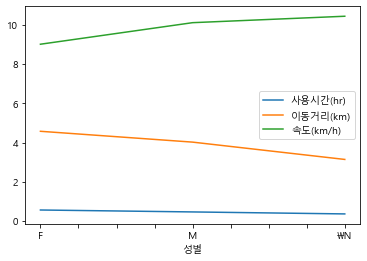

In [102]:
sex_plot.plot()

In [103]:
# 연도 별 - 사용시간/이동거리/속도
grouped_yr_df = df.groupby('년')

In [104]:
yr_plot = grouped_yr_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
yr_plot

사용시간(hr)  이동거리(km)  속도(km/h)
년                                 
2018  0.495492  4.258253  9.904782
2019  0.530407  4.648569  9.806558
2020  0.661468  5.012870  8.803996

<AxesSubplot:xlabel='년'>

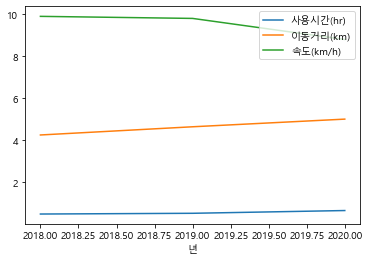

In [105]:
yr_plot.plot()

In [106]:
# 월별 - 사용시간/이동거리/속도
grouped_mth_df = df.groupby('월')

In [107]:
grouped_mth_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

사용시간(hr)  이동거리(km)   속도(km/h)
월                                
1   0.353034  2.972759  10.409988
2   0.396590  3.394052  10.237261
3   0.622464  5.337944   9.578308
4   0.627747  5.237050   9.464098
5   0.637981  5.222502   9.335921
6   0.602922  5.067470   9.450412
7   0.568634  4.737251   9.260666
8   0.564755  4.908133   9.740895
9   0.618200  5.137637   9.411894
10  0.548088  4.586936   9.526458
11  0.429253  3.525983   9.796115
12  0.372518  2.945139   9.915934

In [108]:
# 대여권 별 - 사용시간/이동거리/속도
grouped_membership_df = df.groupby('대여권')
grouped_membership_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

사용시간(hr)   이동거리(km)  속도(km/h)
대여권                               
단체권  1.557690  11.831594  7.684933
일일권  0.877108   6.993269  8.651926
정기권  0.470938   4.027274  9.803516

In [109]:
# 그룹화된 데이터의 빈도(갯수) 카운트
# df.groupby('col')['col'].nunique()

In [110]:
# --------------------------------------------시각화-------------------------------------------------------

In [111]:
# 대여시간(24) & 속도 
# plt.bar(df['대여시간(24)'], df['속도(km/h)'])

# plt.xlabel('대여시간(24:00')
# plt.ylabel('속도(km/h)')
# plt.title('대여시간 별 자전거 속도')

# plt.show()

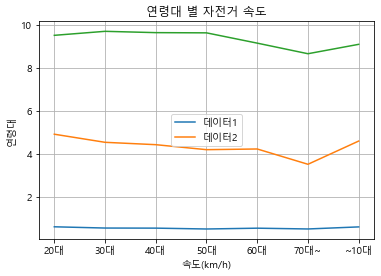

In [112]:
plt.plot(age_plot) 
plt.legend(['데이터1', '데이터2'])
plt.xlabel('속도(km/h)')
plt.ylabel('연령대')
plt.title('연령대 별 자전거 속도')
plt.grid(True)
plt.show()

In [ ]:
# 안됨

# 조건 입력 : 연령대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
# cond_ds30s = (df.년 == '30대')
# df.loc[cond_ds30s, ['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]


# dataset (ds) 연도별

# ds2020 = df[df['년'] == '2020']  

# yr2020 = df[df.년 != '2019']
# yr2020 = df[df.년 != '2018']
# yr2020.head()